# Code 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#time parameters
dt = 0.01 #ms
T = 1000 #total time(ms)
time = np.arange(0,T,dt)

In [3]:
#spike timing
pre_spike_time = 200 #ms
post_spike_time = 210 #ms(delta t>0 LTP-Like)

pre_spike = np.zeros_like(time)
post_spike = np.zeros_like(time)

pre_spike[int(pre_spike_time/dt)]=1
post_spike[int(post_spike_time/dt)]=1

In [4]:
#calcium dynamics model
tau_ca = 50 # decay time constant
A_pre = 1.0
A_post = 1.2

ca = np.zeros_like(time)

for t in range(1,len(time)):
    ca[t] = ca[t-1] - (ca[t-1]/tau_ca)*dt
    ca[t] += A_pre * pre_spike[t]
    ca[t] += A_post * post_spike[t]

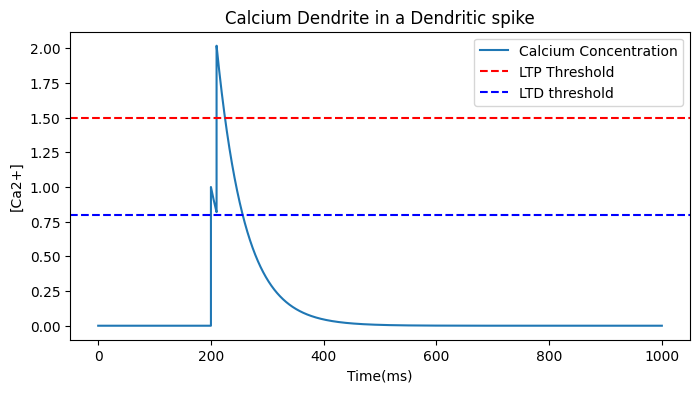

In [6]:
#plot calcium trace

plt.figure(figsize=(8,4))
plt.plot(time , ca, label='Calcium Concentration')
plt.axhline(1.5 , color='r', linestyle='--',label= 'LTP Threshold')
plt.axhline(0.8 ,color ='b' ,linestyle = '--' ,label = 'LTD threshold')
plt.xlabel('Time(ms)')
plt.ylabel('[Ca2+]')
plt.legend()
plt.title('Calcium Dendrite in a Dendritic spike')
plt.show()

In [7]:
#plasticity rule

def synaptic_change(ca):
    if ca > 1.5:
        return 1 #ltp
    elif ca > 0.8:
        return -1 #ltd
    else:
        return 0

plasticity = np.array([synaptic_change(c) for c in ca])

In [8]:
#synaptic weight evolution

w = np.zeros_like(time)
w[0] = 1.0 #initial synaptic weight

for t in range (1,len(time)):
    w[t] = w[t-1] + 0.001*plasticity[t]

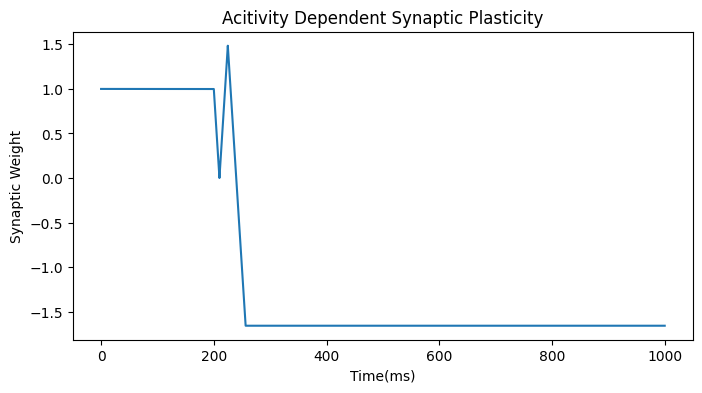

In [9]:
#plot synaptic weight

plt.figure(figsize=(8,4))
plt.plot(time,w)
plt.xlabel('Time(ms)')
plt.ylabel('Synaptic Weight')
plt.title('Acitivity Dependent Synaptic Plasticity')
plt.show()

# Code 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#1. Stimulation parameter
T = 300 #total time
dt = 0.1 #time step
time = np.arange(0,T,dt)

In [3]:
# 2.Presynaptic spike train
spike_times = np.arange(50,300,50) #spike every 50 ms

In [4]:
# 3.Calicium dynamics parameter
ca_rest = 0.05 #resting calcium concentration
ca = ca_rest
tau_ca = 30 #calcium decay time constant(ms)
ca_influx=0.6 #calcium increase per spike

In [5]:
# 4. Synaptic release parameter
K_d = 0.3 #calcium sensitivity
n = 4 #cooperativity(biologically realistic)

In [6]:
def release_probability(ca):
    return(ca**n)/(ca**n + K_d**n)

In [7]:
# 5.Storage variable
ca_trace = []
release_trace = []

In [8]:
# 6.Main simulation loop
for t in time:
    #calcium decay
    ca += dt*(-(ca-ca_rest)/tau_ca)

    #ca influx on pre synaptic spike
    if np.any(np.isclose(t,spike_times, atol=dt)):
        ca += ca_influx

    #synaptic release probability
    P_release = release_probability(ca)

    #store values
    ca_trace.append(ca)
    release_trace.append(P_release)

In [10]:
# 7.convert to numpy array
ca_trace = np.array(ca_trace)
release_trace = np.array(release_trace)

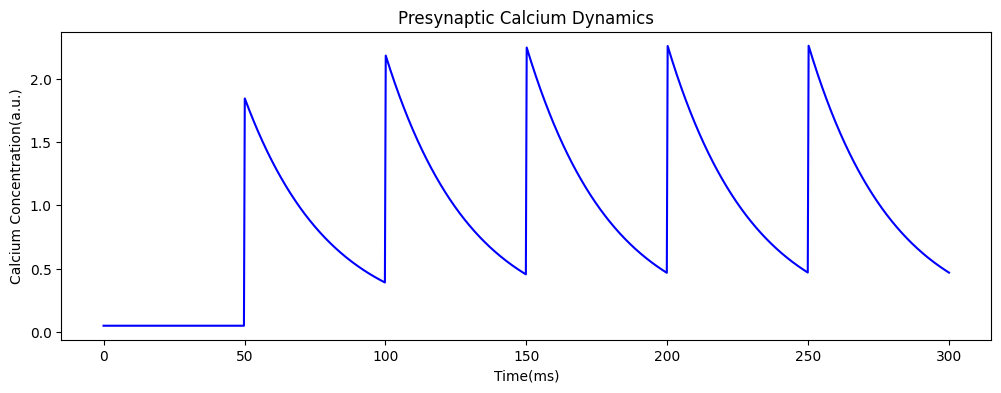

In [11]:
# 8.Calcium Dynamics
plt.figure(figsize=(12,4))
plt.plot(time, ca_trace , color='blue')
plt.xlabel("Time(ms)")
plt.ylabel("Calcium Concentration(a.u.)")
plt.title("Presynaptic Calcium Dynamics")
plt.show()

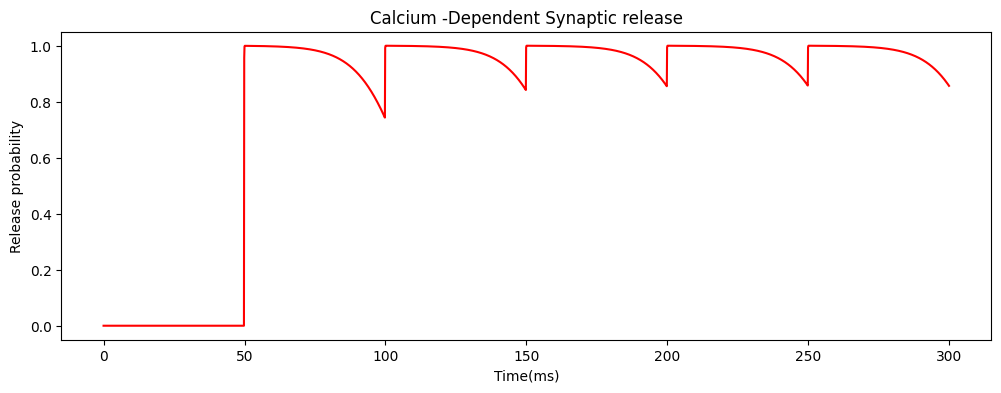

In [12]:
# 9.Synaptic release probability
plt.figure(figsize=(12,4))
plt.plot(time , release_trace , color='red')
plt.xlabel("Time(ms)")
plt.ylabel("Release probability")
plt.title("Calcium -Dependent Synaptic release")
plt.show()